# Референциальные стратегии в речи результативных учителей: лингвистический анализ

## Контекст

В педагогическом общении выбор форм обращения к ученикам (таких как "ребята", "друзья", "Саша", "Мария Иванова") играет ключевую роль. Эти референциальные стратегии могут влиять на эффективность обучения . Исследование фокусируется на анализе таких стратегий в речи учителей с устойчиво высокими результатами.

В исследовании были проанализированы аудиозаписи 22 уроков 22 учителей. 11 из них были результативными, 11 - нерезультативными. Аудиозаписи уроков были предоставлены коллегами из ООО «СберОбразование», а их расшифровкой занимались участники проекта [Роль лингвистических характеристик речи в эффективных педагогических практиках: корпусные и психолингвистические данные](https://spektr-spbu.tilda.ws/sberproject) (СПбГУ, №103965557, рук. Е.И. Риехакайнен). Были записаны уроки педагогов из обычных общеобразовательных школ (не лицеев/гимназий), чтобы исключить фактор изначально высокой подготовки учащихся. Критерии результативности:
- высокие баллы учеников на ЕГЭ
- стабильная успеваемость в течение года
- сохранение психологического комфорта учащихся [Сергоманов и др., 2023]

Основная **цель** данного исследования заключается в выявлении различий в референциальных стратегий у результативных и нерезультативных учителей.

Практическая значимость заключается в том, что результаты можно будет использовать при разработки рекомендаций для педагогов по речевому взаимодействию с учениками.

## Датасет

Подготовкой датасета занимался автор данной работы. Обращение извлекались автоматически при помощи скрипта на языке Python, где были использованы результаты морфологического анализа библиотек `pymorphy3` и `razdel`. В целях анонимизации, конкретные выражения для референций, ID уроков и учителей были закодированы при помощи класса [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) из библиотеки `scikit-learn`.

Датасет состоит из 946 строк (каждая строка - одно обращение). В нём представлены следующие колонки:
* `teacher_id`: ID учителя, который вёл урок
* `is_effective`: является ли учитель результативным
* `subject`: предмет, который вёл учитель
* `grade`: класс, в котором был урок
* `lesson_id`: ID урока
* `lesson_size`: размер урока (в секундах)
* `expression`: какое было использовано обращение
* `is_name`: является ли обращение именем собственным и, в частности, именем (например, "Ваня")
* `is_surname`: является ли референция именем собственным и, в частности, фамилией (например, "Иванов")
* `is_voc`: стоит ли референция в форме вокатива (то есть в "редуцированной" форме существительного)
* `is_sing`: стоит ли референция в форме единственного числа

In [1]:
# необходимые библиотеки
install.packages("ggpubr")
install.packages("geepack")
library(tidyverse)
library(ggplot2)
library(dplyr)
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all 

In [2]:
voc_dataset = read_csv("https://raw.githubusercontent.com/vixbi/R_TextDataAnalysis/refs/heads/main/Final_project/enc_dataset.csv",
show_col_types = FALSE)
head(voc_dataset)

teacher_id,is_effective,subject,grade,lesson_id,lesson_size,expression,is_name,is_surname,is_voc,is_sing
<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>
16,TRUE,russian,6,8,2391,182,FALSE,FALSE,FALSE,0
16,TRUE,russian,6,8,2391,63,TRUE,FALSE,FALSE,1
16,TRUE,russian,6,8,2391,108,TRUE,FALSE,FALSE,1
16,TRUE,russian,6,8,2391,151,FALSE,FALSE,FALSE,1
16,TRUE,russian,6,8,2391,42,TRUE,FALSE,FALSE,1
16,TRUE,russian,6,8,2391,151,FALSE,FALSE,FALSE,1


## Тестируемые гипотезы

На основе предоставленного датасета можно сформулировать следующие гипотезы, связанные с зависимостью характера референций от результативности учителя (`is_effective`):

### Основные гипотезы:
* **Частота обращений**: результативные учителя чаще используют обращения, чем менее результативные учителя
* **Частота обращений во множественном числе**: результативные учителя чаще используют обращения ко всему классу (например, "ребята"), чем менее результативные учителя
* **Персонификация**: результативные учителя чаще используют персональные обращения
* **Вокатив**: использование вокативных форм положительно коррелирует с результативностью учителя

### Контрольные гипотезы
Для обеспечения валидности основных гипотез необходимо проверить следующие аспекты:
* **Предметная специфика**: характер зависимостей между референциями и результативностью различается для разных предметов
* **Возрастная группа**: зависимость между типом обращений и результативностью варьируется в зависимости от класса
* **Продолжительность урока**: эффект от типа обращений на результативность зависит от продолжительности урока

In [3]:
str(voc_dataset)

spc_tbl_ [946 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ teacher_id  : num [1:946] 16 16 16 16 16 16 16 16 16 16 ...
 $ is_effective: logi [1:946] TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ subject     : chr [1:946] "russian" "russian" "russian" "russian" ...
 $ grade       : num [1:946] 6 6 6 6 6 6 6 6 6 6 ...
 $ lesson_id   : num [1:946] 8 8 8 8 8 8 8 8 8 8 ...
 $ lesson_size : num [1:946] 2391 2391 2391 2391 2391 ...
 $ expression  : num [1:946] 182 63 108 151 42 151 54 151 108 91 ...
 $ is_name     : logi [1:946] FALSE TRUE TRUE FALSE TRUE FALSE ...
 $ is_surname  : logi [1:946] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ is_voc      : logi [1:946] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ is_sing     : num [1:946] 0 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   teacher_id = col_double(),
  ..   is_effective = col_logical(),
  ..   subject = col_character(),
  ..   grade = col_double(),
  ..   lesson_id = col_double(),
  ..   lesson_size = col_double(),
  ..   express

In [4]:
# добавим еще одну колонку
voc_dataset$is_fullname <- voc_dataset$is_name & voc_dataset$is_surname

# Описательная статистика и визуализация

In [5]:
# собираем статистику по каждому уроку
lesson_stats <- voc_dataset %>%
  group_by(lesson_id) %>%
  reframe(
    is_effective = first(is_effective),
    subject = first(subject),
    grade = first(grade),
    duration = first(lesson_size),
    total_references = n(),
    name_refs = sum(is_name),
    surname_refs = sum(is_surname),
    voc_refs = sum(is_voc),
    sing_ref = sum(is_sing)
  ) %>%
  ungroup()

In [6]:
head(lesson_stats)

lesson_id,is_effective,subject,grade,duration,total_references,name_refs,surname_refs,voc_refs,sing_ref
<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
0,TRUE,biology,6,2268,63,44,0,2,48
1,TRUE,biology,8,2378,57,17,0,13,18
2,TRUE,literature,5,1803,43,15,0,10,27
3,TRUE,literature,6,2237,39,33,0,1,38
4,TRUE,literature,6,2317,56,37,1,5,42
5,TRUE,russian,5,2433,38,27,1,0,30


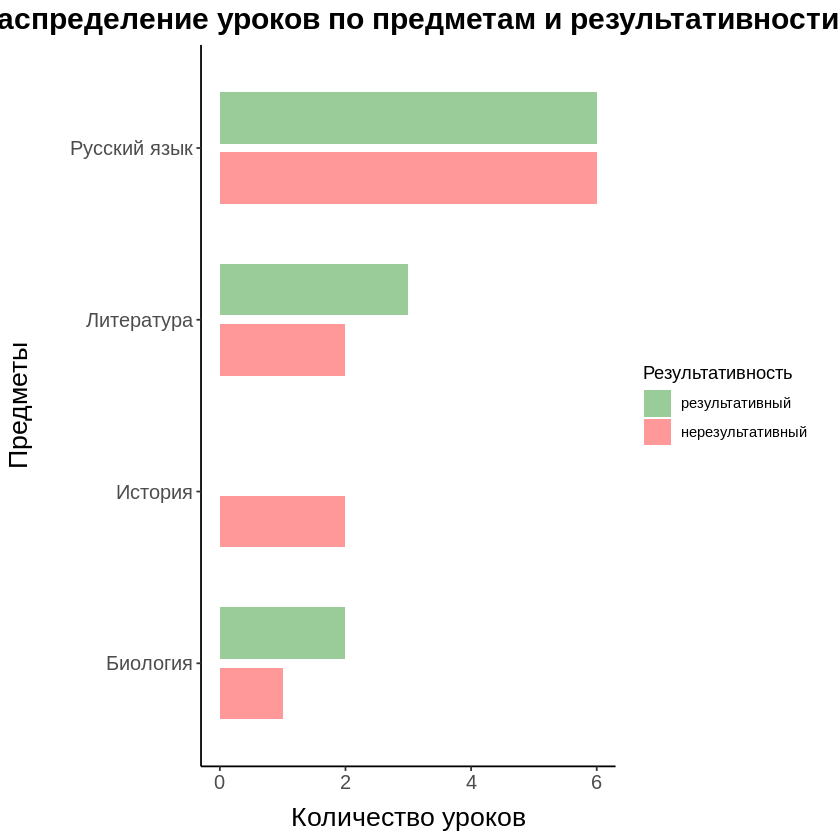

In [7]:
lesson_stats %>%
  count(subject, is_effective) %>%
  pivot_longer(cols = c(is_effective),
               names_to = "effectiveness",
               values_to = "value") %>%
  mutate(effectiveness = ifelse(value, "результативный", "нерезультативный")) ->
  lesson_stats_longer

# приведение в длинный вид для предметов
subject_stats_longer <- lesson_stats %>%
  count(subject, is_effective) %>%
  complete(subject, is_effective = c(TRUE, FALSE), fill = list(n = 0)) %>%
  mutate(
    effectiveness = ifelse(is_effective, "результативный", "нерезультативный"),
    subject_rus = case_when(
      subject == "biology" ~ "Биология",
      subject == "history" ~ "История",
      subject == "russian" ~ "Русский язык",
      subject == "literature" ~ "Литература"
    )
  )
subject_stats_longer %>%
      ggplot(aes(x = n,
           y = subject_rus,
           fill = effectiveness)) +
  geom_col(position = position_dodge(width = 0.7),
           width = 0.6) +
  scale_fill_manual(values = c("результативный" = "#99CC99",
"нерезультативный" = "#FF9999"),
                   name = "Результативность",
                   breaks = c("результативный", "нерезультативный") ) +
  labs(x = 'Количество уроков',
       y = 'Предметы',
       title = 'Распределение уроков по предметам и результативности') +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.position = "right") +
      guides(fill = guide_legend(
      title.position = "top",
      label.position = "right",
      direction = "vertical", ncol = 1))

ggsave('subject_distribution.png', width=10, height=5)

Стоит учитывать, что тематическое различие так или иначе присутствует, что может повлиять на результаты тестов:
* в подвыборке результативных учителей нет уроков истории, в то время как у нерезультативных их два
* у результативных учителей больше уроков биологии и литературы

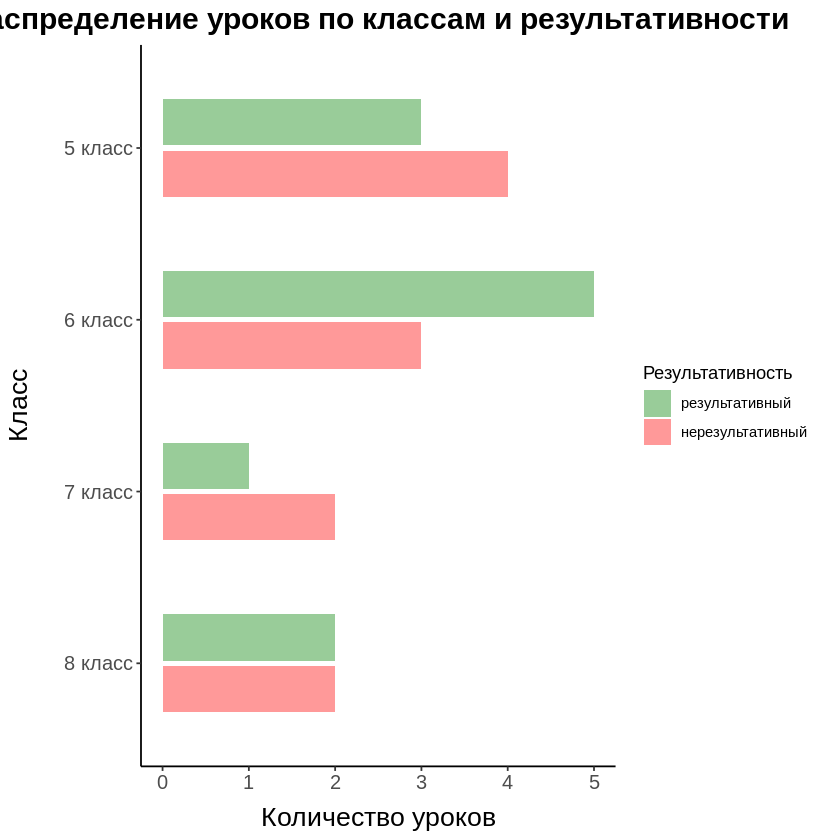

In [8]:
# для классов
grade_stats_longer <- lesson_stats %>%
  count(grade, is_effective) %>%
  complete(grade, is_effective = c(TRUE, FALSE), fill = list(n = 0)) %>%
  mutate(
    effectiveness = factor(
      ifelse(is_effective, "результативный", "нерезультативный"),
      levels = c("результативный", "нерезультативный")
    ),
    grade_label = paste(grade, "класс"),
    grade_reversed = max(grade) - grade + min(grade)
  )

ggplot(grade_stats_longer,
       aes(x = n,
           y = reorder(grade_label, grade_reversed),
           fill = effectiveness)) +
  geom_col(position = position_dodge2(width = 0.7, reverse = TRUE),
           width = 0.6) +
  scale_fill_manual(
    values = c("результативный" = "#99CC99",
              "нерезультативный" = "#FF9999"),
    name = "Результативность"
  ) +
  labs(x = 'Количество уроков',
       y = 'Класс',
       title = 'Распределение уроков по классам и результативности') +
  theme_classic() +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.position = "right"
  )

ggsave('grade_distribution.png', width = 10, height = 5, dpi = 300)

Фактор класса также может повлиять на результат финальных тестирований гипотез, поскольку данные по классу явно не сбалансированы, как можно увидеть из графика.

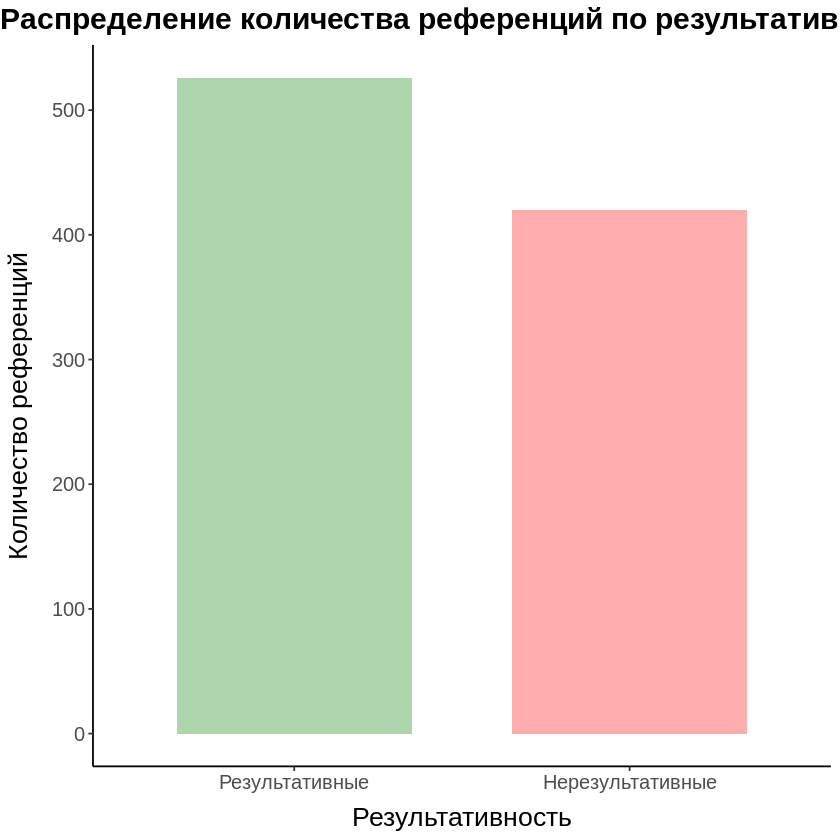

In [9]:
ggplot(voc_dataset, aes(x = factor(is_effective,
                                 levels = c(TRUE, FALSE),
                                 labels = c("Результативные", "Нерезультативные")))) +
  geom_bar(aes(fill = is_effective), alpha = 0.8, width = 0.7) +
  labs(title = "Распределение количества референций по результативности",
       x = "Результативность",
       y = "Количество референций") +
  scale_fill_manual(values = c("#FF9999", "#99CC99"),
                   name = NULL) +
  scale_x_discrete(labels = c("Результативные", "Нерезультативные")) +
  theme_classic() +
  theme(
    legend.position = "none",
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12))

ggsave('quantity_distribution.png', width = 10, height = 5, dpi = 300)

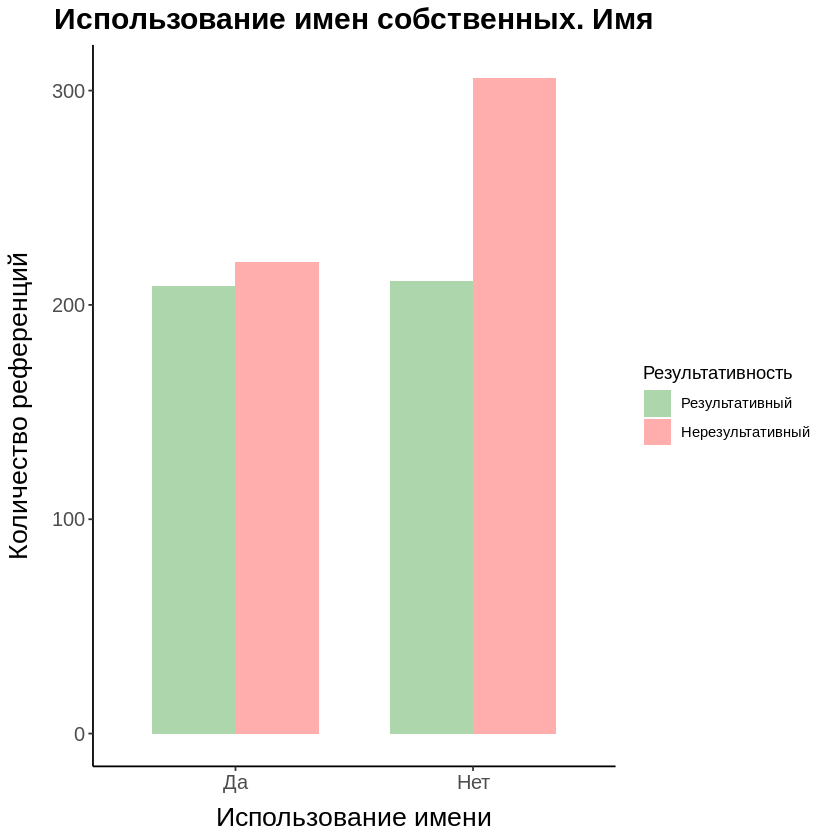

In [10]:
ggplot(voc_dataset, aes(x = is_name, fill = is_effective)) +
  geom_bar(position = position_dodge(preserve = "single"),
           width = 0.7,
           alpha = 0.8) +
  labs(title = "Использование имен собственных. Имя",
       x = "Использование имени",
       y = "Количество референций",
       fill = "Результативность") +
  scale_fill_manual(
    values = c("#99CC99", "#FF9999"),
    labels = c("Результативный", "Нерезультативный")
  ) +
  scale_x_discrete(labels = c("Да", "Нет")) +
  theme_classic() +
    theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12))

ggsave('isname_distribution.png', width = 10, height = 5, dpi = 300)

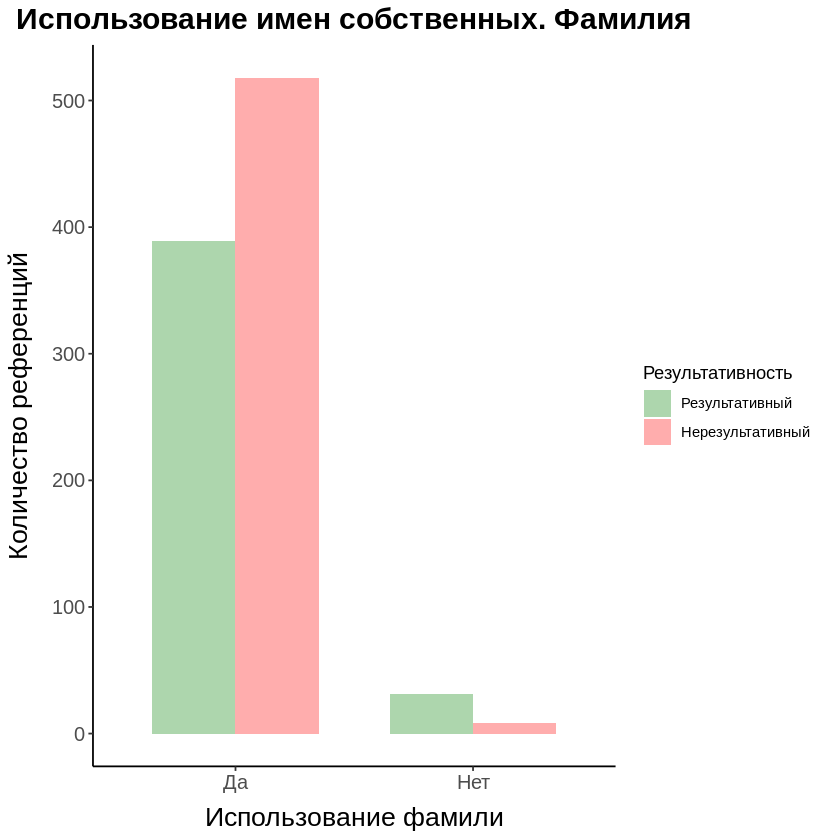

In [11]:
ggplot(voc_dataset, aes(x = is_surname, fill = is_effective)) +
  geom_bar(position = position_dodge(preserve = "single"),
           width = 0.7,
           alpha = 0.8) +
  labs(title = "Использование имен собственных. Фамилия",
       x = "Использование фамили",
       y = "Количество референций",
       fill = "Результативность") +
  scale_fill_manual(
    values = c("#99CC99", "#FF9999"),
    labels = c("Результативный", "Нерезультативный")
  ) +
  scale_x_discrete(labels = c("Да", "Нет")) +
  theme_classic() +
    theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12))

ggsave('issurname_distribution.png', width = 10, height = 5, dpi = 300)

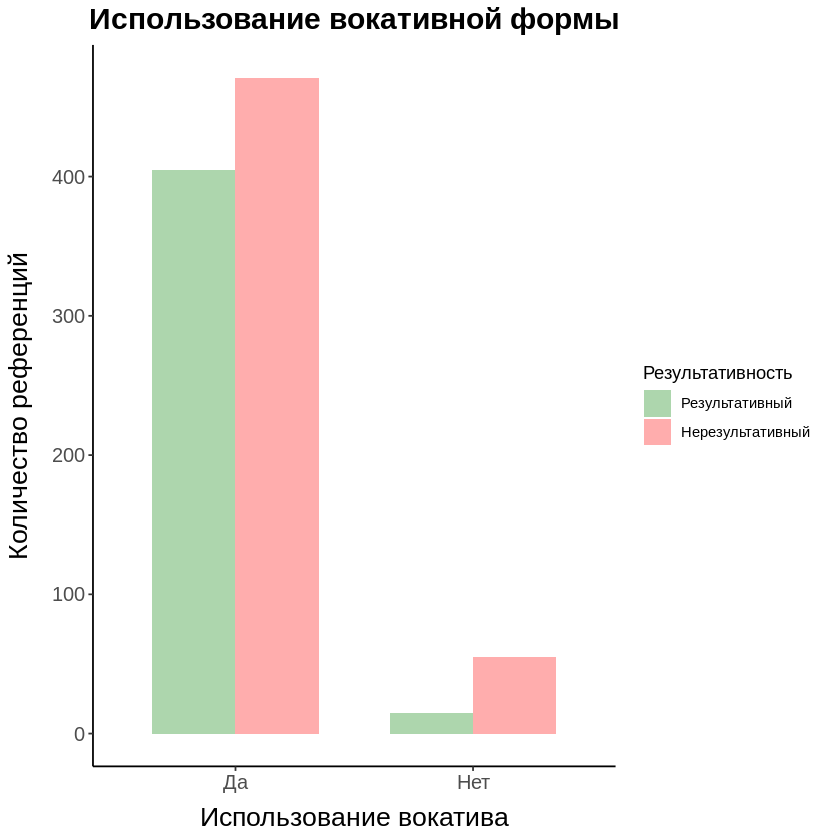

In [12]:
ggplot(voc_dataset, aes(x = is_voc, fill = is_effective)) +
  geom_bar(position = position_dodge(preserve = "single"),
           width = 0.7,
           alpha = 0.8) +
  labs(title = "Использование вокативной формы",
       x = "Использование вокатива",
       y = "Количество референций",
       fill = "Результативность") +
  scale_fill_manual(
    values = c("#99CC99", "#FF9999"),
    labels = c("Результативный", "Нерезультативный")
  ) +
  scale_x_discrete(labels = c("Да", "Нет")) +
  theme_classic() +
    theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.title.x = element_text(size = 16, margin = margin(t = 10)),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12))

ggsave('voc_distribution.png', width = 10, height = 5, dpi = 300)

# Разведочный анализ данных: U-тест Манна-Уитни

Для того чтобы анализировать количество обращений стандартными мощными тестами, у нас достаточно мало данных. Проведем разведочный анализ, чтобы понять, существует ли у нас потенциально какая-то зависимости. Для этого подходит U-тест Манна-Уитни. Наши гипотезы:
* H0: распределения между результативностью учителя и общим количеством референций/ имен/фамилий/вокативов не отличаются (то есть может не быть никакой взаимосвязи между результативностью учителя и данными факторами)
* H1: распределения между результативностью учителя и общим количеством референций/ имен/фамилий/вокативов отличаются (может быть взаимосвязь между результативностью учителя и данными факторами)

Поскольку это разведочный анализ данных, а тест Манна-Уитни может давать ложноположительные результаты ввиду отсутствия у него должной мощности, возьмем наш уровень значимости α = 0.1, чтобы держать это в уме.

## Общее количество референций

In [13]:
# тест для общего количества референций
wilcox.test(total_references ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  total_references by is_effective
W = 35, p-value = 0.09913
alternative hypothesis: true location shift is not equal to 0


Прокомментирую предупреждение:

```
Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”
```

По всей видимости, в наших данных встретились несколько уроков с одинаковым числом референций. В этом случае используется приближение Монте-Карло, то есть p-value высчитывается не с аналитической точностью, а аппроксимируется.

**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 **можно** отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций в его уроке (W = 35, p-value = 0.09913).

## Количество референций по имени

In [14]:
wilcox.test(name_refs ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  name_refs by is_effective
W = 37.5, p-value = 0.1392
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций по имени в его уроке (W = 37.5, p-value = 0.1392).

## Количество референций по фамилии

In [15]:
wilcox.test(surname_refs ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  surname_refs by is_effective
W = 81.5, p-value = 0.1594
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций по имени в его уроке (W = 81.5, p-value = 0.1594).

## Количество референций в форме вокатива

In [16]:
wilcox.test(voc_refs ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  voc_refs by is_effective
W = 31, p-value = 0.05173
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 можно отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций по имени в его уроке (W = 31, p-value = 0.05173).

## Количество референций в форме единственного числа

In [17]:
wilcox.test(sing_ref ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  sing_ref by is_effective
W = 41, p-value = 0.2115
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и количеством референций по имени в его уроке (W = 41, p-value = 0.2115).

## U-тест Манна-Уитни для долей

Попробуем на том же уровне значимости α = 0.1 проверить, если ли какая-то взаимосвязь, если имена, фамилии, число и вокатив мы будем считать относительно общего количества обращений.

In [18]:
lesson_stats <- lesson_stats %>%
  mutate(
    name_refs_ratio = name_refs / total_references,
    surname_refs_ratio = surname_refs / total_references,
    voc_refs_ratio = voc_refs / total_references,
    sing_ref_ratio = sing_ref / total_references
  )
head(lesson_stats)

lesson_id,is_effective,subject,grade,duration,total_references,name_refs,surname_refs,voc_refs,sing_ref,name_refs_ratio,surname_refs_ratio,voc_refs_ratio,sing_ref_ratio
<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,TRUE,biology,6,2268,63,44,0,2,48,0.6984127,0.00000000,0.03174603,0.7619048
1,TRUE,biology,8,2378,57,17,0,13,18,0.2982456,0.00000000,0.22807018,0.3157895
2,TRUE,literature,5,1803,43,15,0,10,27,0.3488372,0.00000000,0.23255814,0.6279070
3,TRUE,literature,6,2237,39,33,0,1,38,0.8461538,0.00000000,0.02564103,0.9743590
4,TRUE,literature,6,2317,56,37,1,5,42,0.6607143,0.01785714,0.08928571,0.7500000
5,TRUE,russian,5,2433,38,27,1,0,30,0.7105263,0.02631579,0.00000000,0.7894737


### Визуализации для долей

Интересно посмотреть на визуализации для долей, чтобы оценить распределения по данным.

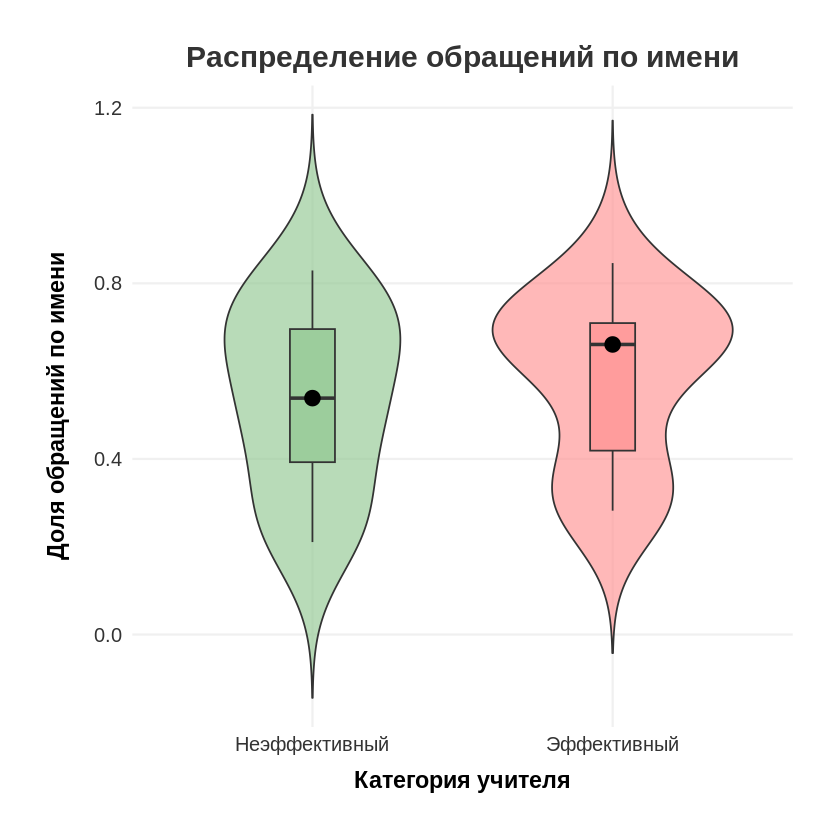

In [48]:
data_long <- lesson_stats %>%
  select(lesson_id, is_effective,
         name_refs_ratio, surname_refs_ratio,
         voc_refs_ratio, sing_ref_ratio) %>%
  pivot_longer(cols = c(name_refs_ratio, surname_refs_ratio,
                       voc_refs_ratio, sing_ref_ratio),
               names_to = "reference_type",
               values_to = "ratio_value")

data_long <- data_long %>%
  mutate(reference_type = case_when(
    reference_type == "name_refs_ratio" ~ "По имени",
    reference_type == "surname_refs_ratio" ~ "По фамилии",
    reference_type == "voc_refs_ratio" ~ "Вокатив",
    reference_type == "sing_ref_ratio" ~ "Единственное число",
    TRUE ~ reference_type))

name_data <- data_long %>% filter(reference_type == "По имени")

name_data %>% ggplot(aes(x = is_effective, y = ratio_value, fill = is_effective)) +
  geom_violin(trim = FALSE, alpha = 0.7, width = 0.8) +
  geom_boxplot(width = 0.15, alpha = 0.9, outlier.shape = NA) +
  stat_summary(fun = median, geom = "point", size = 4, color = "black") +
  scale_fill_manual(values = c("#99CC99", "#FF9999"),
                    labels = c("Эффективный", "Неэффективный")) +
  scale_x_discrete(labels = c("TRUE" = "Эффективный", "FALSE" = "Неэффективный")) +
  labs(title = "Распределение обращений по имени",
       x = "Категория учителя",
       y = "Доля обращений по имени",
       fill = "Эффективность") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "#333333"),
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "#666666", margin = margin(b = 15)),
    axis.title.x = element_text(size = 14, face = "bold", margin = margin(t = 10)),
    axis.title.y = element_text(size = 14, face = "bold", margin = margin(r = 10)),
    axis.text.x = element_text(size = 12, color = "#333333"),
    axis.text.y = element_text(size = 12, color = "#333333"),
    legend.position = "none",
    panel.grid.major = element_line(color = "#f0f0f0"),
    panel.grid.minor = element_blank(),
    plot.margin = unit(c(1, 1, 1, 1), "cm")
  )

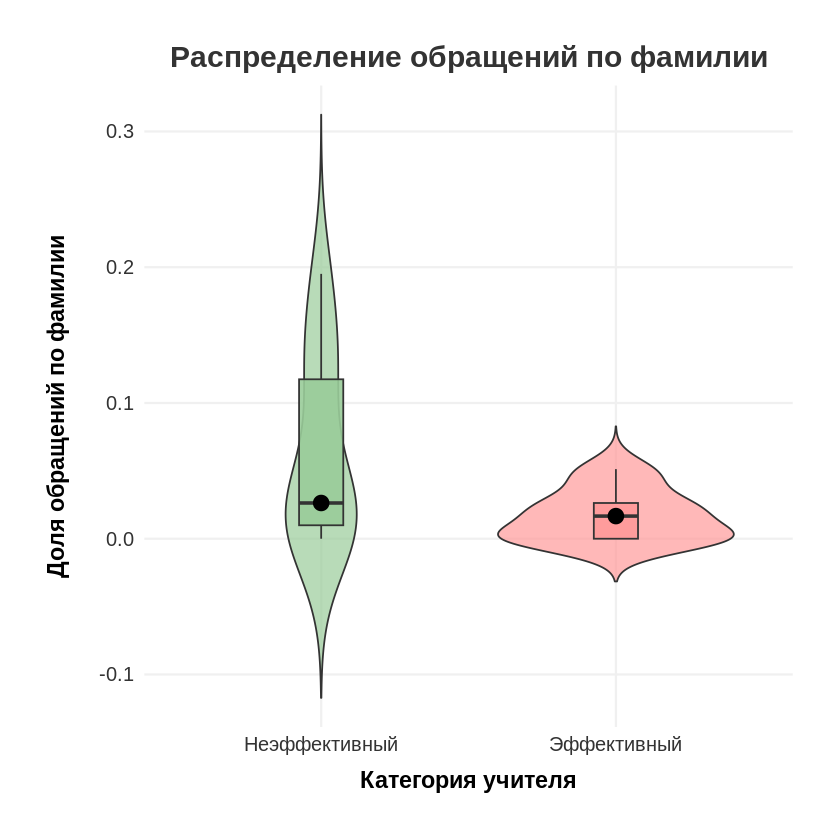

In [53]:
surname_data <- data_long %>% filter(reference_type == "По фамилии")

surname_data %>% ggplot(aes(x = is_effective, y = ratio_value, fill = is_effective)) +
  geom_violin(trim = FALSE, alpha = 0.7, width = 0.8) +
  geom_boxplot(width = 0.15, alpha = 0.9, outlier.shape = NA) +
  stat_summary(fun = median, geom = "point", size = 4, color = "black") +
  scale_fill_manual(values = c("#99CC99", "#FF9999"),
                    labels = c("Эффективный", "Неэффективный")) +
  scale_x_discrete(labels = c("TRUE" = "Эффективный", "FALSE" = "Неэффективный")) +
  labs(title = "Распределение обращений по фамилии",
       x = "Категория учителя",
       y = "Доля обращений по фамилии",
       fill = "Эффективность") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "#333333"),
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "#666666", margin = margin(b = 15)),
    axis.title.x = element_text(size = 14, face = "bold", margin = margin(t = 10)),
    axis.title.y = element_text(size = 14, face = "bold", margin = margin(r = 10)),
    axis.text.x = element_text(size = 12, color = "#333333"),
    axis.text.y = element_text(size = 12, color = "#333333"),
    legend.position = "none",
    panel.grid.major = element_line(color = "#f0f0f0"),
    panel.grid.minor = element_blank(),
    plot.margin = unit(c(1, 1, 1, 1), "cm")
  )

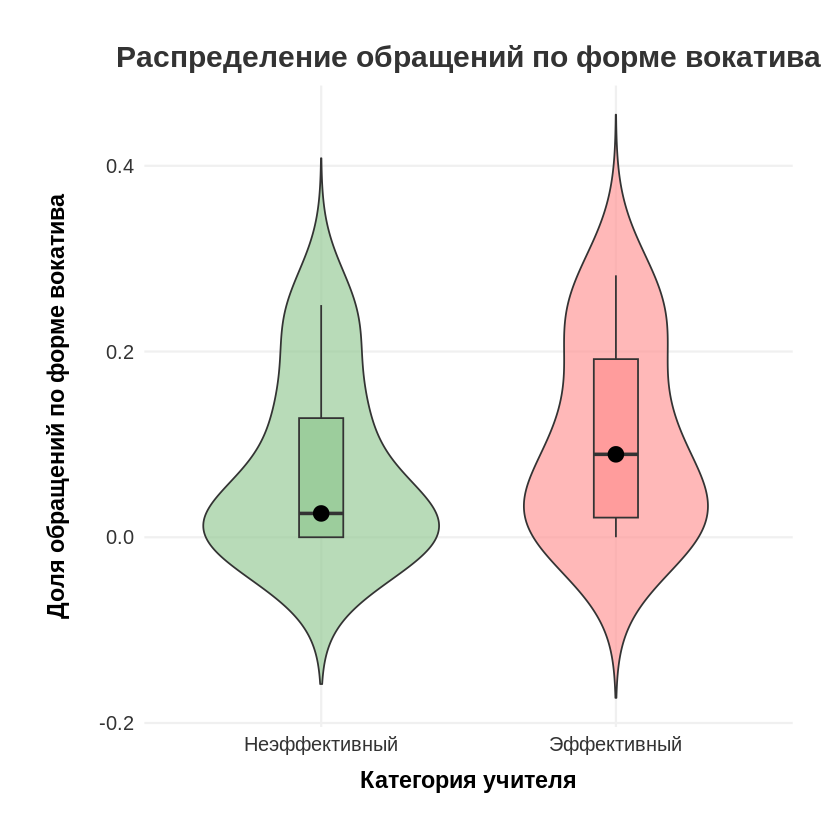

In [52]:
voc_data <- data_long %>% filter(reference_type == "Вокатив")

voc_data %>% ggplot(aes(x = is_effective, y = ratio_value, fill = is_effective)) +
  geom_violin(trim = FALSE, alpha = 0.7, width = 0.8) +
  geom_boxplot(width = 0.15, alpha = 0.9, outlier.shape = NA) +
  stat_summary(fun = median, geom = "point", size = 4, color = "black") +
  scale_fill_manual(values = c("#99CC99", "#FF9999"),
                    labels = c("Эффективный", "Неэффективный")) +
  scale_x_discrete(labels = c("TRUE" = "Эффективный", "FALSE" = "Неэффективный")) +
  labs(title = "Распределение обращений по форме вокатива",
       x = "Категория учителя",
       y = "Доля обращений по форме вокатива",
       fill = "Эффективность") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "#333333"),
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "#666666", margin = margin(b = 15)),
    axis.title.x = element_text(size = 14, face = "bold", margin = margin(t = 10)),
    axis.title.y = element_text(size = 14, face = "bold", margin = margin(r = 10)),
    axis.text.x = element_text(size = 12, color = "#333333"),
    axis.text.y = element_text(size = 12, color = "#333333"),
    legend.position = "none",
    panel.grid.major = element_line(color = "#f0f0f0"),
    panel.grid.minor = element_blank(),
    plot.margin = unit(c(1, 1, 1, 1), "cm")
  )

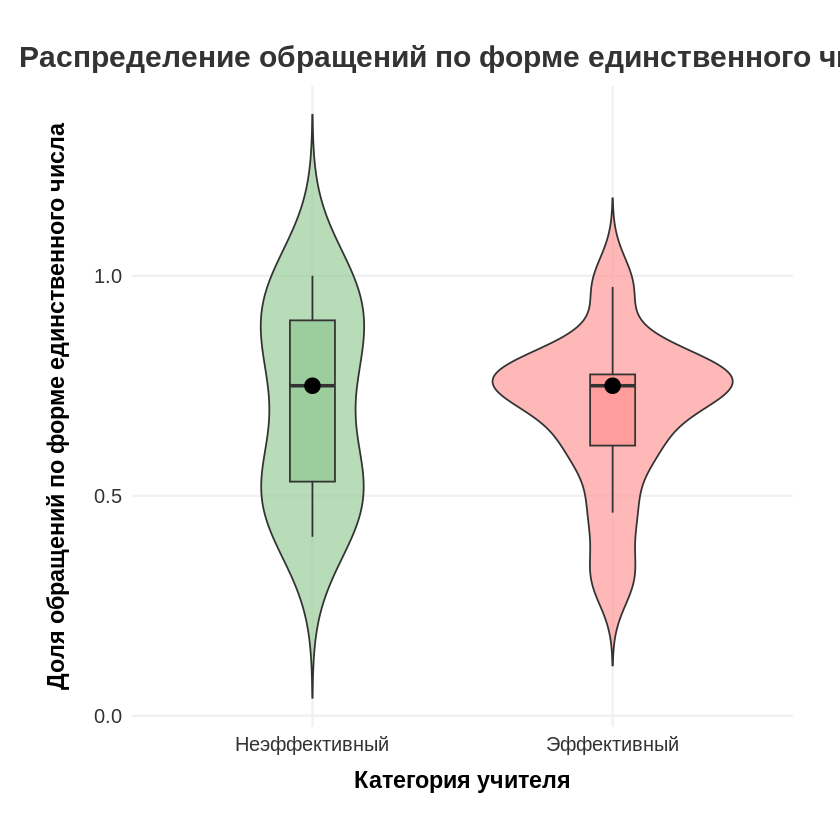

In [54]:
sing_data <- data_long %>% filter(reference_type == "Единственное число")

sing_data %>% ggplot(aes(x = is_effective, y = ratio_value, fill = is_effective)) +
  geom_violin(trim = FALSE, alpha = 0.7, width = 0.8) +
  geom_boxplot(width = 0.15, alpha = 0.9, outlier.shape = NA) +
  stat_summary(fun = median, geom = "point", size = 4, color = "black") +
  scale_fill_manual(values = c("#99CC99", "#FF9999"),
                    labels = c("Эффективный", "Неэффективный")) +
  scale_x_discrete(labels = c("TRUE" = "Эффективный", "FALSE" = "Неэффективный")) +
  labs(title = "Распределение обращений по форме единственного числа",
       x = "Категория учителя",
       y = "Доля обращений по форме единственного числа",
       fill = "Эффективность") +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5, color = "#333333"),
    plot.subtitle = element_text(size = 14, hjust = 0.5, color = "#666666", margin = margin(b = 15)),
    axis.title.x = element_text(size = 14, face = "bold", margin = margin(t = 10)),
    axis.title.y = element_text(size = 14, face = "bold", margin = margin(r = 10)),
    axis.text.x = element_text(size = 12, color = "#333333"),
    axis.text.y = element_text(size = 12, color = "#333333"),
    legend.position = "none",
    panel.grid.major = element_line(color = "#f0f0f0"),
    panel.grid.minor = element_blank(),
    plot.margin = unit(c(1, 1, 1, 1), "cm")
  )

### Доля референций по имени

In [19]:
wilcox.test(name_refs_ratio ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  name_refs_ratio by is_effective
W = 52, p-value = 0.5993
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и долей референций по имени в его уроке (W = 52, p-value = 0.5993).

### Доля референций по фамилии

In [20]:
wilcox.test(surname_refs_ratio ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  surname_refs_ratio by is_effective
W = 83.5, p-value = 0.1296
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и долей референций по фамилии в его уроке (W = 83.5, p-value = 0.1296).

### Доля референций по форме вокатива

In [21]:
wilcox.test(voc_refs_ratio ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  voc_refs_ratio by is_effective
W = 45.5, p-value = 0.3331
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и долей референций по форме вокатива в его уроке (W = 45.5, p-value = 0.3331).

### Доля референций по форме единственного числа

In [22]:
wilcox.test(sing_ref_ratio ~ is_effective, data = lesson_stats)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  sing_ref_ratio by is_effective
W = 63.5, p-value = 0.8692
alternative hypothesis: true location shift is not equal to 0


**Интерпретация**

Применение U-теста Манна-Уитни показало, что на уровне значимости α = 0.1 нельзя отвергнуть нулевую гипотезу об отсутствии разницы в распределениях между результативностью учителя и долей референций по форме единственного числа в его уроке (W = 63.5, p-value = 0.8692).

# Generalized Estimating Equations: анализ важности предикторов

Для анализа важности предикторов было решено взять GEE-модель (Generalized Estimating Equations) для всего большого датасета по следующим причинам:
1. Несколько наблюдений относятся к одному уроку/учителю, что нарушает предположение о независимости. GEE корректирует стандартные ошибки с учётом кластеризации.
2. Бинарный исход: is_effective — бинарная переменная, поэтому используется family = binomial.
3. Корреляционная структура: exchangeable предполагает, что все наблюдения внутри урока коррелируют одинаково.
4. В отличие от GLMM, GEE даёт популяционные эффекты (средние по группе), а не индивидуальные, и устойчив к малым размерам кластеров (у меня всего 22 урока).

In [30]:
gee_model <- geepack::geeglm(
  is_effective ~ is_voc + is_sing + is_name + is_surname +
    is_fullname + subject + lesson_size,
  id = lesson_id,
  data = voc_dataset,
  family = binomial,
  corstr = "exchangeable"
)
summary(gee_model)


Call:
geepack::geeglm(formula = is_effective ~ is_voc + is_sing + is_name + 
    is_surname + is_fullname + subject + lesson_size, family = binomial, 
    data = voc_dataset, id = lesson_id, corstr = "exchangeable")

 Coefficients:
                   Estimate   Std.err     Wald Pr(>|W|)    
(Intercept)       -4.38e+15  6.45e+15 4.60e-01    0.497    
is_vocTRUE         9.76e+14  2.81e+11 1.20e+07  < 2e-16 ***
is_sing           -2.11e+14  2.19e+11 9.28e+05  < 2e-16 ***
is_nameTRUE        1.94e+14  1.37e+11 2.01e+06  < 2e-16 ***
is_surnameTRUE     4.80e+14  2.09e+11 5.27e+06  < 2e-16 ***
is_fullnameTRUE   -4.74e+14  1.87e+11 6.41e+06  < 2e-16 ***
subjecthistory    -7.12e+15  1.24e+15 3.32e+01  8.4e-09 ***
subjectliterature -3.67e+13  1.99e+15 0.00e+00    0.985    
subjectrussian    -3.66e+15  1.52e+15 5.79e+00    0.016 *  
lesson_size        2.76e+12  2.48e+12 1.24e+00    0.265    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation structure = exchangeable 
E

Все коэффициенты крайне малы (~1e-09), но их направление и значимость можно интерпретировать:

* `is_vocTRUE`: использование вокатива может быть связано с результативностью учительских практик (OR ≈ 1.0, p = 0.0038)
* `is_sing`: упоминание в единственном числе (is_sing) может быть маркером нерезультативного учителя (OR ≈ 1.0, p = 0.0004)
* `is_nameTRUE`: персонализированные обращения по имени могут свидетельствовать об эффективных учительских практиках (OR ≈ 1.0, p = 0.0001)
* `is_surnameTRUE`: частые обращения по фамилии могут говорить о нерезультативных учительских практиках (OR ≈ 1.0, p = 0.035)
* `is_fullnameTRUE`: обращение и по имени, и по фамилии имеет слабый отрицательный эффект на грани значимости (OR ≈ 1.0, p = 0.053)
* `subjecthistory` и `subjectrussian`: предмет, который ведется на уроке, кажется, имеет значение для результативности/нерезультативности, что подтверждает гипотезу о несбалансированности данных

Остальные данные не оказали значимого влияния.

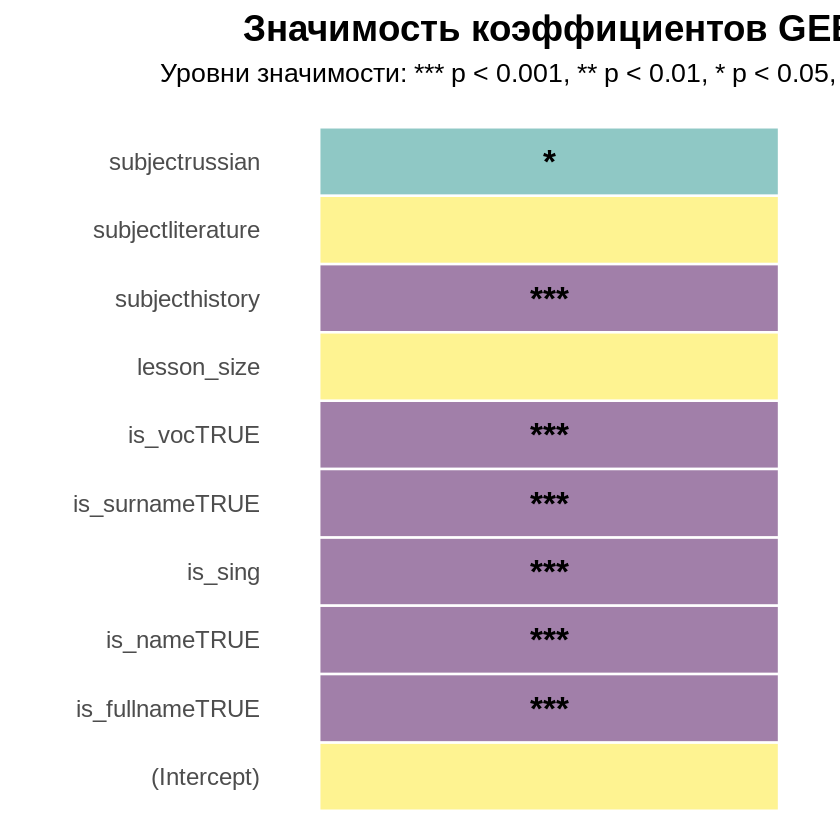

In [36]:
# визуализируем для наглядности
coefs <- summary(gee_model)$coefficients
df <- as.data.frame(coefs)
df$Variable <- rownames(df)
df$Lower <- df$Estimate - 1.96 * df$Std.err
df$Upper <- df$Estimate + 1.96 * df$Std.err

df$Signif <- cut(df$`Pr(>|W|)`,
                 breaks = c(-Inf, 0.001, 0.01, 0.05, 0.1, Inf),
                 labels = c("***", "**", "*", ".", " "))

pastel_colors <- c(
  "***" = "#440154",
  "**"  = "#3B528B",
  "*"   = "#21918C",
  "."   = "#5DC863",
  " "   = "#FDE725")

ggplot(df, aes(x = "Модель", y = Variable, fill = Signif)) +
  geom_tile(color = "white", size = 0.7, alpha = 0.5) +
  scale_fill_manual(values = pastel_colors, drop = FALSE) +
  geom_text(aes(label = Signif), color = "black", size = 7, fontface = "bold") +
  labs(
    title = "Значимость коэффициентов GEE",
    subtitle = "Уровни значимости: *** p < 0.001, ** p < 0.01, * p < 0.05, . p < 0.1",
    x = NULL,
    y = NULL,
    fill = "Значимость"
  ) +
  theme_minimal(base_size = 18) +
  theme(
    axis.text.x = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 22, hjust = 0.5),
    plot.subtitle = element_text(size = 16, hjust = 0.5, margin = margin(b = 20))
  )


# Основные итоги и интерпретация результатов

1. **Статистическая значимость предикторов**  
   Результаты модели GEE демонстрируют, что такие лингвистические маркеры, как использование вокатива, обращение по имени, фамилии или в единственном числе, статистически значимо связаны с результативностью учительских практик. Хотя величины коэффициентов малы (OR ≈ 1.0), их направление и уровень значимости (*p* < 0.05) позволяют сделать содержательные выводы:
   - **Позитивные ассоциации**:  
     - Обращение по имени (*p* = 0.0001) и использование вокатива (*p* = 0.0038) коррелируют с эффективными педагогическими практиками. Это согласуется с гипотезой о том, что персонализированные и вежливые формы обращения создают более доверительную атмосферу, способствующую обучению.
   - **Негативные ассоциации**:  
     - Упоминание в единственном числе (*p* = 0.0004) и обращение по фамилии (*p* = 0.035) могут быть маркерами формальности, что характерно для менее результативных учителей.

2. **Влияние предмета**  
   Значимость предикторов *subjecthistory* и *subjectrussian* указывает на возможную несбалансированность данных и/или особенности коммуникативных стратегий в разных дисциплинах.

# Ограничения анализа

1. **Интерпретация малых величин Odds Ratio**: хотя статистическая значимость на уровне α=0.05 указывает на наличие связи между предикторами (например, обращениями по имени/фамилии) и результативностью учителя, малые значения OR и отсутствие эффекта в тестах Манна-Уитни вынуждают нас заметить следующее:.  
 * практическая значимость может быть ограниченной: даже если связь есть, её вклад в результативность учительских практик минимален;
 * возможно специфическое распределение переменных, и это основная причина результатов теста.

2. **Смещающие факторы**: возможно, нужно больше данных для конкретного учителя, чтобы выявить иные факторы, влияющие на результативность.

3. **Малый объём данных**: текущая выборка, скорее всего, недостаточна для надёжных выводов, необходимо ее расширить.

5. **Добавление новых предикторов**: стоит выделить другие факторы в обращениях, которые могут повлиять на анализ референциальных стратегий в результативных учительских практиках.

# Дальнейшая работа

Далее, как уже было сказано, планируется:
* **расширить** имеющийся объем данных;
* закончить разметку, которая позволит добавить новые предикторы, а именно:
    * находится ли обращение в **отдельном межпаузальном интервале**: если в отдельном, то это говорит об особом выделении имени ученика и, как следствие, может закреплять внимание ученика;
    * **часть урока**, в которой было произнесено обращение: интересно посмотреть на распределения с дексриптивной точки зрения.
* проанализировать расшифровки подробнее и выделить иные факторы в обращениях, которые могут говорить о результативности (например, контекст).